In [1]:
import keras
import keras_applications
from keras.layers import Input
from keras.models import Model
from keras_applications.resnet_common import ResNet101
from PIL import Image

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# set the globals of the Keras applications package. this is necessary because Keras is nearly
# a year out of date as of writing this and doesn't have ResNet101, so keras_applications has 
# to be handled directly...
keras_applications.set_keras_submodules(
    backend=keras.backend,
    layers=keras.layers,
    models=keras.models,
    utils=keras.utils
)

In [3]:
from dataset import DataSet
from keras_pyramid_pooling_module import PyramidPoolingModule

# CamVid Data Loader

In [4]:
data = DataSet('data/CamVid', 
    mapping='data/CamVid/12_class.txt', 
    ignored_labels=['Void'], 
    rotation_range=10
)

In [5]:
generators = data.generators()

## Example image tuple

In [6]:
X, y = next(generators['train'])

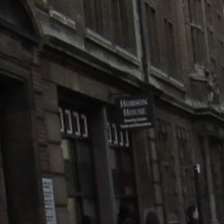

In [7]:
Image.fromarray(X[1].astype('uint8'))

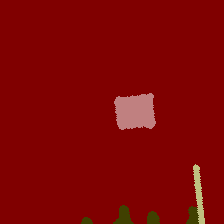

In [8]:
Image.fromarray(data.unmap(y)[1].astype('uint8'))

# PSPNet Model

In [16]:
input_ = Input(data.shape)
x = ResNet101(include_top=False, weights='imagenet', input_tensor=None, input_shape=None)(input_)
x = PyramidPoolingModule()(x)
model = Model(inputs=input_, outputs=x)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
resnet101 (Model)            multiple                  42658176  
_________________________________________________________________
pyramid_pooling_module_1 (Py (None, 7, 7, 4096)        4194304   
Total params: 46,852,480
Trainable params: 46,747,136
Non-trainable params: 105,344
_________________________________________________________________


In [ ]:
ResNet101(include_top=False, weights='imagenet', input_tensor=None, input_shape=None)